# Laboratorio 6

Indicaciones generales:

* En lo que respecta a `C` no deberá punteros, ni arreglos. Tampoco se deberá emplear administración de memoria dinámica, ni de funciones auxiliares de ninguna librería.

* Los puntajes de ítems relacionados con mediciones de tiempo, error relativo y presentación de gráficos solo serán asignados en caso sus funciones estén correctamente implementadas.

* Las funciones implementadas solo deberán tener los argumentos mencionados en su respectivo ítem.

* Los resultados de la función `_slow_` serán las referencias para medir los speedups.

* No se puede emplear ChatGPT, ni ningún modelo de lenguaje.

* Puede emplear apuntes, clases y hacer consultas en foros de internet.

In [8]:
# no borrar esta celda
! rm *.c *.o *.so

rm: cannot remove '*.c': No such file or directory
rm: cannot remove '*.o': No such file or directory
rm: cannot remove '*.so': No such file or directory


## Ejercicio

El seno de un ángulo `x` se calcula con la siguiente serie:

$$
sin(x) = x - \frac{x^{3}}{3!} + \frac{x^{5}}{5!} - \frac{x^{7}}{7!} + \frac{x^{9}}{9!} - \cdots
$$

Durante el laboratorio se le solicitará implementar una grupo de funciones basados en esta serie

1. Implementar una función en `python` que calcule el seno de un ángulo `x`.

Nombre: `py_slow_sin`

Argumentos:
* `x` : ángulo
* `n_terms`: cantidad de términos

Resultado: `sin(x)`

Observaciones: 
* No debe emplear funciones de módulos auxiliares, ni suyas propias.
* No hacer llamadas a función. 
* El cálculo del factorial se debe hacer dentro de la función.

In [51]:
def py_slow_sin(angle,n_terms):
    suma=0
    signo=1
    for i in range(int(n_terms)):
        fact=1
        for n in range(1, (2*i+1)+1):
            fact=fact*n
        if(fact==0):
            fact=1   
        term=((angle**(2*i+1.0))/fact)
        suma=suma+term*signo
        signo=signo*(-1)
        #print("iteracion numero:", i)
        #print("factorial:",fact)
        #print("exponente: ", 2*i+1)
        #print("termino: ",term)
        #print("signo", signo)
    return suma

In [52]:
import math
print(py_slow_sin(math.pi,85))



3.3280566969799443e-16


2. Implementar una función en `python` que calcule el seno de un ángulo `x`.

Nombre: `py_fast_sin`

Argumentos:
* `x` : ángulo
* `n_terms`: cantidad de términos

Resultado: `sin(x)`

Observaciones: 
* No puede emplear factorial de ninguna manera. 
* No debe emplear funciones de módulos auxiliares, ni suyas propias.
* Debe ser iterativo.
* Sugerencia: Deducir el término $t_{n+1}$ en función del término $t_{n}$

In [3]:
def py_fast_sin(x,n_terms):
    term=x
    suma=0
    for i in range(n_terms):
        if(i==0):
            suma=x
        else:
            n=2*i+1
            term=(-1*term*x*x)*(1.0/(n*(n-1)))
            suma=suma+term
    return suma

In [4]:
print(py_fast_sin(math.pi,2000))

3.343842278865617e-16


3. En una celda mágica implementar dos versiones en `C` para la función `py_fast_sin`. Una versión trabajará con tipo `double` y otra versión trabajará con tipo `long double`. Considere que estas funciones tienen los mismos argumentos que `py_fast_sin`. 

Observaciones:
* Justifique el tipo de dato de cada uno de los argumentos.
* Justifique el tipo de dato que devuelve la función.

In [5]:
%%file C_sin_x.c
#include <stdio.h>
#include <stdint.h>
double sin_x_fast_1 (double x,uint64_t n_terms ){
    double term=x;
    double suma=0.0;
    for (int i=0; i<n_terms; i++){
        if(i==0){
            suma=x;
        }else{
            int n=2*i+1;
            term=(-1*term*x*x)*(1.0/(n*(n-1.0)));
            suma=suma+term;
           // printf("%lf\n",term);
        }
    }
    return suma;
}

long double sin_x_fast_2 (long double x,uint64_t n_terms ){
    long double term=x;
    long double suma=0.0;
    uint64_t n;
    for (int i=0; i<n_terms; i++){
        if(i==0){
            suma=x;
        }else{
            uint64_t n=2*i+1;
            term=(-1*term*x*x)*(1/(long double)(n*(n-1)));
            suma=suma+term;
            //printf("%Lf\n",term);
        }
    }
    return suma;
}

/*int main(){
    double x=sin_x_fast_1(1.0, 2);
    printf("%lf",x );
    return 0;
}*/

Overwriting C_sin_x.c


In [6]:
! gcc C_sin_x.c -o C_sin_c

/usr/bin/ld: /usr/lib/gcc/x86_64-linux-gnu/11/../../../x86_64-linux-gnu/Scrt1.o: in function `_start':
(.text+0x1b): undefined reference to `main'
collect2: error: ld returned 1 exit status


In [7]:
!./C_sin_x.c

/bin/bash: line 1: ./C_sin_x.c: Permission denied


4. Crear el *object file* y la *shared library*

In [8]:
! gcc -c C_sin_x.c -o C_sin_x.o

In [9]:
! gcc -shared C_sin_x.o -o C_sin_x.so

5. Hacer una función que enlace con `Python` mediante `ctypes` las funciones anteriores. Esta función debe devolver las dos funciones configuradas.

In [10]:
import ctypes
def Ctypes_funcs():
    libfile = './C_sin_x.so'
    lib= ctypes.CDLL(libfile)
    lib.sin_x_fast_1.argtypes = [ctypes.c_double, ctypes.c_uint64]
    lib.sin_x_fast_1.restype = ctypes.c_double
    lib.sin_x_fast_2.argtypes = [ctypes.c_longdouble, ctypes.c_uint64]
    lib.sin_x_fast_2.restype = ctypes.c_longdouble
    return lib.sin_x_fast_1, lib.sin_x_fast_2

6. Haga una instancia de las dos funciones

In [11]:
sin_x_fast_1, sin_x_fast_2 = Ctypes_funcs()

In [12]:
import math
print(sin_x_fast_1(math.pi/2,200000))

1.0000000000000002


In [13]:
print(sin_x_fast_2(math.pi/2,200000))

1.0


7. Implemente una función que de forma iterativa encuentre la cantidad de términos que requieren sus funciones para calcular con una determinada precisión el seno de un grupo de ángulos definidos entre $[inf, sup]$.

Nombre de la función: `encontrar_n_terms`

Argumentos:

* `f`: función

* `inf`: extremo izquierdo del dominio

* `sup`: extremo derecho del dominio

* `n_angs`: cantidad de ángulos

* `pre`: precisión

Resultado: Cantidad de términos

Observaciones: 
* Puede usar la función `linspace` del módulo `numpy` para crear su vector de ángulos, y la función `norm` del submódulo `linalg` del módulo `numpy` para calcular la norma de un arreglo. 
* Para su referencia considere el resultado de la función `sin` del módulo `numpy`.



In [64]:
import numpy as np
import linalg as LA
import math
def encontrar_n_terms(f,inf,sup,n_angs,pre):
    lista_n_terms = []
    arreglo = np.linspace( inf , sup ,num=n_angs)
    arr_referencia= np.sin(arreglo)
    for i in range(n_angs):
        angle=arreglo[i]
        referencia=arr_referencia[i]
        n_terms=1
        while(True):
            res = f(angle,n_terms)
            precision = abs(res- referencia) 
            if(precision < pre):
                break
            n_terms = n_terms + 1
        lista_n_terms.append(n_terms)
    return lista_n_terms
    

In [62]:
import numpy as np
import linalg as LA
import math
def encontrar_n_terms(f,inf,sup,n_angs,pre):
    arreglo = np.linspace(inf,sup,num=n_angs)
    arr_referencia = np.sin(arreglo)
    res = []
    n_terms = 1
    
    while(True):
        for i in range(len(res)):
            res.append(f(n_terms,arreglo[i]))
        precision = np.linalg.norm(res-arr_referencia) 
        if(precision < pre):
            break
        n_terms=n_terms+1
        res=[]
    return n_terms


8. Haga una prueba de `encontrar_n_terms` para cada una de sus funciones. 

Considere:
* `inf` = -2pi
* `sup` = 2pi
* `n_angs` = 1000
* `pre` = 4e-15

Observación: Cada resultado debe estar asignado a una variable independiente y ser mostrado en una celda

In [65]:
import math
inf= -2*math.pi
sup = 2*math.pi
n_angs= 1000
pre= 4e-14
slow = encontrar_n_terms(py_slow_sin,inf,sup, n_angs,pre)
print(slow)

[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,

In [66]:
import math
inf= -2*math.pi
sup = 2*math.pi
n_angs= 1000
pre= 4e-14
fast = encontrar_n_terms(py_fast_sin,inf,sup, n_angs,pre)
print(fast)

[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,

In [67]:
inf= -2*math.pi
sup = 2*math.pi
n_angs= 1000
pre= 4e-14
c_1 = encontrar_n_terms(sin_x_fast_1,inf,sup, n_angs,pre)
print(c_1)

[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,

In [68]:
c_2 = encontrar_n_terms(sin_x_fast_2,inf,sup, n_angs,pre)
print(c_2)

[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,

9. Implemente una función que realice una cantidad de mediciones de tiempo de alguna de sus funciones que calcula el seno y devuelva la mediana de esas mediciones.

Nombre de la función: `encontrar_mediana_de_mediciones_sin`
Argumentos:
* `f`: función
* `ang`: ángulo de la función
* `n_terms`: cantidad de términos de la función
* `n_iter`: cantidad de iteraciones

Resultado: Mediana de las mediciones realizadas.

Observación: Puede emplear la función `median` del módulo `statistics`.

In [69]:
import time
import statistics
def encontrar_mediana_de_mediciones_sin(f, ang, n_terms, n_iter):
    lista=[]
    for i in range(n_iter):
        tic = time.perf_counter()
        f(ang,n_terms)
        toc = time.perf_counter()
        tiempo=toc-tic
        lista.append(tiempo)
    mediana= statistics.median(lista)
    return mediana


10. Haga dos pruebas de `encontrar_mediana_de_mediciones_sin` para cada una de sus funciones. 

Prueba 1 :
* `ang` = `inf`
* `n_iter` = 50

Prueba 2 :
* `ang` = `sup`
* `n_iter` = 50

Observaciones:

* Cada función empleará su cantidad de términos previamente calculados
* Cada resultado deberá ser asignado a una variable independiente

In [70]:
#slow
slow_1=encontrar_mediana_de_mediciones_sin(py_slow_sin, -2*math.pi, slow[0], 50)*10**3
slow_2=encontrar_mediana_de_mediciones_sin(py_slow_sin, 2*math.pi, slow[-1], 50)*10**3
#fast
fast_1=encontrar_mediana_de_mediciones_sin(py_fast_sin, -2*math.pi, fast[0], 50)*10**3
fast_2=encontrar_mediana_de_mediciones_sin(py_fast_sin, 2*math.pi, fast[-1], 50)*10**3

#c_1
c_1_1=encontrar_mediana_de_mediciones_sin(sin_x_fast_1, -2*math.pi, c_1[0], 50)*10**3
c_1_2=encontrar_mediana_de_mediciones_sin(sin_x_fast_1, 2*math.pi, c_1[-1], 50)*10**3

#c_2
c_2_1=encontrar_mediana_de_mediciones_sin(sin_x_fast_2, -2*math.pi, c_2[0], 50)*10**3
c_2_2=encontrar_mediana_de_mediciones_sin(sin_x_fast_2, 2*math.pi, c_2[-1], 50)*10**3

print(slow_1)
print(slow_2)
print(fast_1)
print(fast_2)
print(c_1_1)
print(c_1_2)
print(c_2_1)
print(c_2_2)

0.016846999642439187
0.01634449654375203
0.002613498509163037
0.0026130001060664654
0.0005500005499925464
0.0005564979801420122
0.0005659967428073287
0.0005959991540294141


11. Presente gráficos de barras de las medianas de los tiempos y de los speedups a partir de sus resultados del ítem anterior

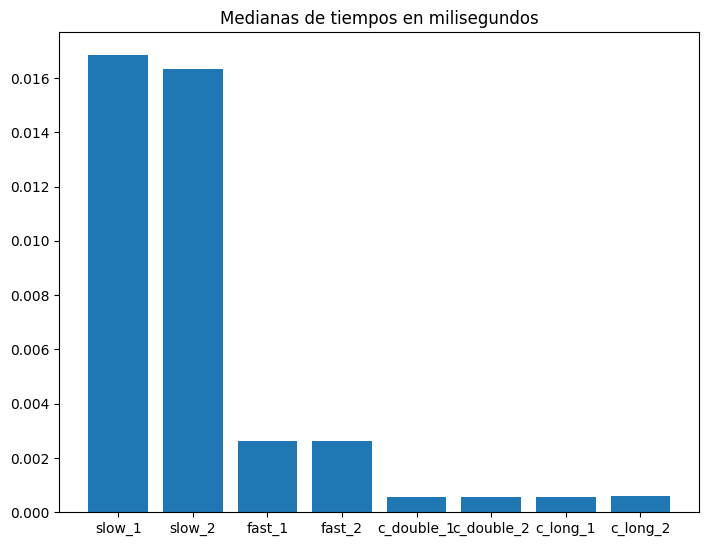

In [71]:
import matplotlib.pyplot as plt
import statistics
medianas= slow_1, slow_2, fast_1, fast_2 , c_1_1, c_1_2, c_2_1 , c_2_2
fig = plt.figure()
ax = fig.add_axes ([0,0,1,1])
casos = ['slow_1', 'slow_2', 'fast_1', 'fast_2', 'c_double_1', 'c_double_2', 'c_long_1', 'c_long_2']
ax.bar(casos,medianas)
plt.title("Medianas de tiempos en milisegundos")
plt.show()

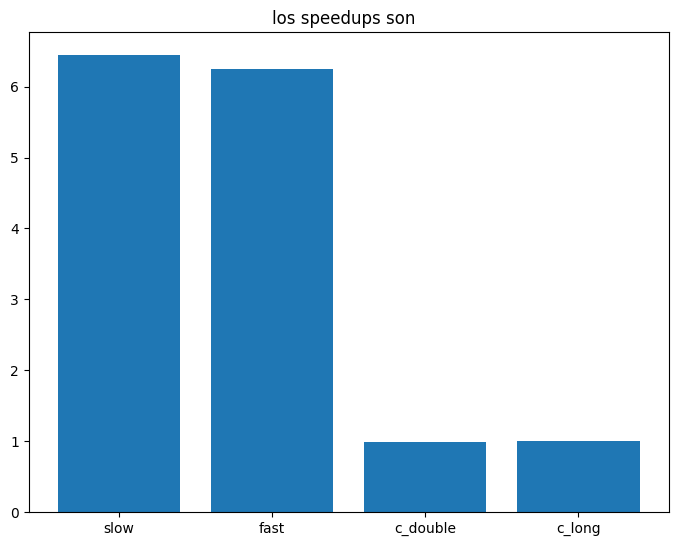

In [72]:
speedups= slow_1/fast_1, slow_2/fast_2 , c_1_1/c_1_2, c_2_2/c_2_2
fig = plt.figure()
ax = fig.add_axes ([0,0,1,1])
casos = ['slow', 'fast', 'c_double', 'c_long']
ax.bar(casos,speedups)
plt.title("los speedups son  ")
plt.show()

12. Implemente una función en `Python` que calcule el seno de los ángulos en el dominio $[inf, sup]$

Nombre de la función: `calc_sins`

Argumentos:
* `f`: función
* `inf`: extremo izquierdo del dominio
* `sup`: extremo derecho del dominio
* `n_angs`: cantidad de ángulos
* `n_terms`: cantidad de términos de la función `f`

Resultado: Arreglo de `numpy` con los senos de los ángulos

Observación: Puede emplear la función `linspace` del módulo `numpy` para crear su arreglo de ángulos.

In [73]:
import numpy as np
import math
def calc_sins(f,inf, sup, n_angs, n_terms):
    arreglo=np.linspace(inf,sup, num=n_angs)
    lista=[]
    for i in range(len(arreglo)):
        lista.append(f(arreglo[i], n_terms))
    return lista

13. Implemente una función que realice una cantidad de mediciones de tiempo de su función anterior y devuelva la mediana de esas mediciones.

Nombre de la función: `encontrar_mediana_de_mediciones_calc_sins`

Argumentos:
* `f`: función
* `inf`: extremo izquierdo del dominio
* `sup`: extremo derecho del dominio
* `n_terms`: cantidad de términos de la función
* `n_iter`: cantidad de iteraciones

Resultado: Mediana de las mediciones realizadas.

Observación: Puede emplear la función `median` del módulo `statistics`.

In [74]:
import time
import statistics
def encontrar_mediana_de_mediciones_calc_sins(f,inf, sup,n_angs ,n_terms, n_iter ):
    lista=[]
    for j in range(n_iter):
        tic=time.perf_counter()
        calc_sins(f,inf, sup, n_angs, n_terms)
        toc=time.perf_counter()
        lista.append(toc-tic)
    return statistics.median(lista)

14. Haga pruebas de `encontrar_mediana_de_mediciones_sins` para cada una de sus funciones. 

Observaciones:

* Los valores para `inf`, `sup`, `n_angs` y `n_iter` serán los mismos que los definidos anteriormente
* Cada función empleará su cantidad de términos previamente calculados
* Cada resultado deberá ser asignado a una variable independiente

In [75]:
n_slow = encontrar_mediana_de_mediciones_calc_sins(py_slow_sin,inf, sup,n_angs ,18, 50 )*10**3
n_fast = encontrar_mediana_de_mediciones_calc_sins(py_fast_sin,inf, sup,n_angs ,18, 50 )*10**3
fast_1 = encontrar_mediana_de_mediciones_calc_sins(sin_x_fast_1,inf, sup,n_angs ,18, 50 )*10**3
fast_2 = encontrar_mediana_de_mediciones_calc_sins(sin_x_fast_2,inf, sup,n_angs ,18, 50 )*10**3
lista_new =[n_slow, n_fast , fast_1 , fast_2]
print([n_slow, n_fast , fast_1 , fast_2])

[37.10082900215639, 4.9267590038653, 0.6981175029068254, 0.7258725017891265]


15. Presente gráficas de barras de las medianas calculadas en el item anterior y de los speedups a partir de los resultados del ítem anterior.

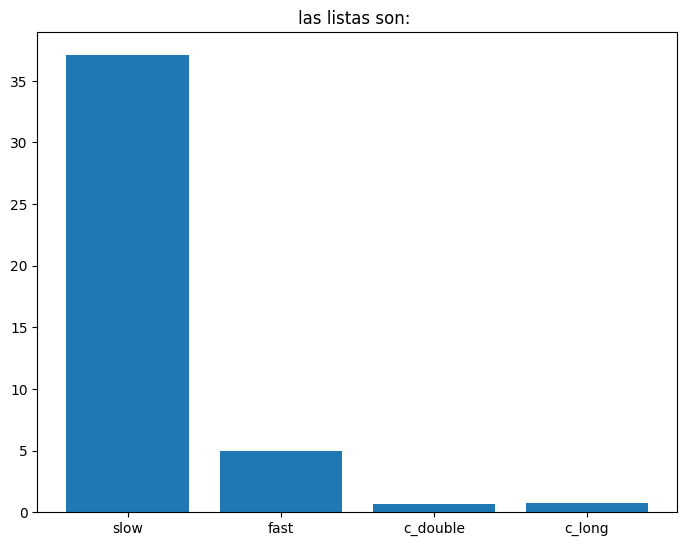

In [76]:

fig = plt.figure()
ax = fig.add_axes ([0,0,1,1])
casos = ['slow', 'fast', 'c_double', 'c_long']
ax.bar(casos,lista_new)
plt.title("las listas son: ")
plt.show()

## Distribución de puntaje

| ítem | puntos |
|:----:|:------:|
|   1  |    1   |
|   2  |    2   |
|   3  |    4   |
|   4  |   0.5  |
|   5  |   0.5  |
|   6  |   0.5  |
|   7  |   1.5  |
|   8  |   0.5  |
|   9  |   1.5  |
|  10  |   0.5  |
|  11  |   0.5  |
|  12  |   0.5  |
|  13  |   0.5  |
|  14  |   0.5  |
|  15  |   0.5  |